# What is Machine Learning?

Machine learning is a subﬁeld of computer science that is concerned with building algorithms which, to be useful, rely on a collection of examples of some phenomenon. 

Machine learning can also be deﬁned as the process of solving a practical problem by: 

1.   gathering a dataset
2.   algorithmically building a statistical model based on that dataset.

That statistical model is assumed to be used somehow to solve the practical problem.

Learning can be supervised, semi-supervised, unsupervised and reinforcement.

## Supervised Learning

In supervised learning, the dataset is the collection of labeled examples {(xi, yi)}i=1 -> N

Each element x among N is called a feature vector. A feature vector is a vector in which each dimension j=1,...,D contains a value that describes the example somehow. That value is called a feature and is denoted as x(j). 

The goal of a supervised learning algorithm is to use the dataset to produce a model that takes a feature vector x as input and outputs information that allows deducing the label for this feature vector. 

#The KNN Algorithm
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data

  3.1 Calculate the distance between the query example and the current example from the data.
  
  3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

In [232]:
import numpy as np
from collections import Counter
import math

def knn(data, query, k):
    neighbor_distances_and_indices = []
    
    # 3. Para cada ejemplo en el dataset
    for index, example in enumerate(data):
        # 3.1 Calcularla distancia entre caso que se está evaluando (los datos)
        # con cada uno de los ejemplos del dataset

        distance = euclidean_distance(example[:-1], query)
        
        # 3.2 a 'neighbor_distances_and_indices' un arreglo de tuplas
        # le añadimos la distancia y indice de de los ejemplos del dataset
        # en una lista 
        neighbor_distances_and_indices.append((distance, index))
    
    # 4. Ordenamos la lista en orden ascendente tomando en cuenta el valor 
    #    de las distancias
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # 5. Tomamos los primeros K registros de la colección ordenada
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # 6. Obtener las etiquetas (ultimo valor de los ejemplos del dataset) de las K entradas seleccionadas
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_distances_and_indices]

    # 8. Clasificación, se retorna la moda de las etiquetas K y ese es el valor que predecimos
    return mode(k_nearest_labels)

def mode(labels):
    return Counter(labels).most_common(1)[0][0]

# point = point(xi,xn) | xi E Z
def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    for i in range(len(point1)):
        sum_squared_distance += math.pow(point1[i] - point2[i], 2)
    return math.sqrt(sum_squared_distance)

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

In [231]:
'''
  Classification Data
  Column 1-64: data info
  Column 65: number
'''
train_data = [
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData1.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData2.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData3.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData4.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData5.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData6.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData7.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData8.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData9.csv', delimiter=','),
            np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/trainData10.csv', delimiter=',')
]

In [220]:
def k_fold_validation(train_dataset, max_k_try_value):
  best_accuracy_metric_table_x_axis = []
  best_accuracy_metric_table_y_axis = []
  for k_value_iterator in range(3, max_k_try_value):
    best_accuracy_metric_table_x_axis.append(k_value_iterator)
    best_accuracy_metric = []
    for index, k_fold in enumerate(train_dataset):
      # Def dataset using kfcv
      dataset = np.array(train_dataset)
      # Se quita el k fold del data set para hacer pruebas con este
      dataset = np.delete(dataset, index, 0)
      # Nos aseguramos que el dataset sea una lista de listas de valores
      dataset = dataset.transpose(1,0,2).reshape(-1,65)
      # limpiamos los datos asegurando que no haya listas repetidas
      dataset = np.unique(dataset, axis=0)
      #----------------------------------------------------------------
      # k_fold -> El k fold que usaremos para hacer las pruebas
      #----------------------------------------------------------------
      # lista en donde se almacenan las predicciones realizadas por el algoritmo
      clf_prediction = []
      # lista en donde se almacenan los valores que ya tenemos de cada uno de los casos de prueba
      clf_labels = []
      '''
        Para cada caso de prueba en el k_fold:
          1- Le aplicamos el algoritmo
          2.- Añadimos la predicción del caso en lista de 'clf_prediction'
        Al final comparamos los valores predichos con el algoritmo con el resultado real 
        de cada caso en el k_fold
      '''
      for case in k_fold:
        clf_labels.append(case[-1])
        case = np.delete(case, len(case)-1, 0)
        prediction = knn(
            dataset,
            case,
            k=k_value_iterator,
            )
        clf_prediction.append(prediction)
      # print("precisión para k con valor " + str(k_value_iterator) 
      # + " para fold " + str(index + 1) + ":")
      best_accuracy_metric.append(accuracy_metric(clf_labels, clf_prediction))
      # print(str(best_accuracy_metric[-1]) + " %")

    best_accuracy_metric_table_y_axis.append(max( best_accuracy_metric ))
  from matplotlib import pyplot as plt
  %matplotlib inline
  plt.plot(best_accuracy_metric_table_x_axis,
          best_accuracy_metric_table_y_axis,
          label='increase accuracy')
  plt.legend()
  plt.xlabel("K values")
  plt.ylabel("accuracy")
  print("Best k value: " 
        + str(best_accuracy_metric_table_x_axis[
                            best_accuracy_metric_table_y_axis.index(
                                max( best_accuracy_metric_table_y_axis )
                            )]) )


Best k value: 47


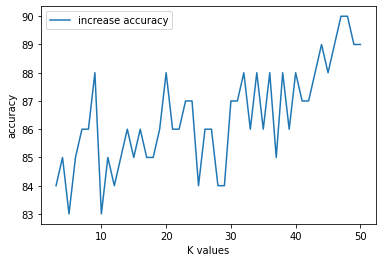

In [221]:
k_fold_validation(train_data,51)

In [233]:
def main(k_vecinos, dataset):
    # Question:
    clf_query = np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/testData.csv', delimiter=',')
    clf_prediction = []
    for case in clf_query:
      prediction = knn(
          dataset,
          case,
          k=k_vecinos,
          )
      clf_prediction.append(prediction)

    clf_labels = np.genfromtxt('./drive/MyDrive/ML/tareas/tarea1/testLabels.csv', delimiter=',')
    print("accuracy metric: ")
    print(str(accuracy_metric(clf_labels, clf_prediction)) + " %")
    

In [234]:
dataset = np.array(train_data)
dataset = dataset.transpose(1,0,2).reshape(-1,65)
# limpiamos los datos asegurando que no haya listas repetidas
dataset = np.unique(dataset, axis=0)

main(47, dataset)

accuracy metric: 
81.81818181818183 %


# Conclusión
El algoritmo K-Neighbors Neighbors (KNN) es un algoritmo de aprendizaje automático supervisado el cual es aplicable tanto para fines de clasificación como de regresión. 

Este algoritmo trabaja analizando en qué medida los datos de entrada son similares a una categoría específica ya conocida. Para determinar la mejor k para el algoritmo KNN, se ha hecho uso del k-fold Cross-Validation el cual es una estrategia de partición de datos para usar un conjunto de datos de manera efectiva para construir un modelo más generalizado.
En este algoritmo los datos deben estandarizarse antes de entrenar el modelo, ya que KNN es un algoritmo de clasificación basado en la distancia. Sin embargo, KNN es uno de los muchos algoritmos de aprendizaje que no basan las predicciones en un modelo de aprendizaje. KNN hace predicciones sobre la marcha promediando la similitud entre un nuevo dato de entrada y los datos ya presentes.